In [1]:
import os
import pandas as pd
import numpy as np

In [10]:
from loading import load_realcause_dataset
from utils import DATA_FOLDER
from models import base

In [3]:
case_id_col = "Case ID"
activity_col = "Activity"
resource_col = "org:resource"
timestamp_col = "time:timestamp"

treatment = 'treatment'
outcome = 'Selected'
activity = 'W_Call incomplete files'

In [4]:
# ADD "open_cases" LATER
dynamic_cat_cols = ["Activity", 'org:resource', 'Action', 'EventOrigin', 'lifecycle:transition']
static_cat_cols = ['ApplicationType', 'LoanGoal']
dynamic_num_cols = ['FirstWithdrawalAmount', 'MonthlyCost', 'NumberOfTerms', 'OfferedAmount', 'CreditScore', 'open_cases',
                    "timesincelastevent", "timesincecasestart", "timesincemidnight", "month", "weekday", "hour"]
static_num_cols = ['RequestedAmount', 'timesincefirstcase', 'treatment', 'Selected']

cat_cols = dynamic_cat_cols + static_cat_cols
num_cols = dynamic_num_cols + static_num_cols

In [5]:
def get_treatment(activity, df):
    df['treatment'] = 0
    df2 = df[df[activity_col] == activity]
    case_ids = list(set(df2[case_id_col]))
    print(len(case_ids))
    df.loc[df[case_id_col].isin(case_ids),"treatment"] = 1
        
    return df

In [6]:
def get_treatment2(df):
    df.loc[df['NumberOfOffers'] > 1, treatment] = 1
    df.loc[df['NumberOfOffers'] == 1, treatment] = 0
    
    df[treatment] = df[treatment].astype(int)
    #df = pd.merge(df_new, df, on='Case ID', how = 'outer')
    
    return df

In [6]:
# for making call
end_activity = [activity]
end_points = []
def cut_between_activities(group):
    end_activity_idxs = np.where(group[activity_col].isin(end_activity))[0]
    if len(end_activity_idxs) > 0:
        cut_idx_end = end_activity_idxs[0]
        end_points.append(cut_idx_end)
    else:

        cut_idx_end = int(np.random.choice(list(range(min(end_points), max(end_points))), 1))
        if group[group["nr_event"]==1].iloc[0]["event_nr"] <= cut_idx_end:
            cut_idx_end = min(end_points)
    
    return group[:cut_idx_end]

In [8]:
# for multiple offers
end_activity = ['O_Created']
end_points = []
def cut_between_activities(group):
    end_activity_idxs = np.where(group[activity_col].isin(end_activity))[0]
    if len(end_activity_idxs) > 1:
        cut_idx_end = end_activity_idxs[1]
        end_points.append(cut_idx_end)
    else:

        cut_idx_end = int(np.random.choice(list(range(min(end_points), max(end_points))), 1))
        if group[group["nr_event"]==1].iloc[0]["event_nr"] <= cut_idx_end:
            cut_idx_end = min(end_points)
    
    return group[:cut_idx_end]

In [7]:
#df = load_realcause_dataset('lalonde_psid')
df = pd.read_csv('BPIC17_O_Accepted.csv', sep=';')

In [10]:
df

,Case ID,NumberOfOffers,FreqOfIncompleteness,ApplicationType,LoanGoal,RequestedAmount,timesincefirstcase,duration,Activity,org:resource,Action,EventOrigin,lifecycle:transition,Accepted,Selected,FirstWithdrawalAmount,MonthlyCost,NumberOfTerms,OfferedAmount,CreditScore,open_cases,timesincelastevent,timesincecasestart,timesincemidnight,event_nr,nr_event,month,weekday,hour,time:timestamp
0,Application_1000086665,1,0.0,New credit,"Other, see explanation",5000.0,215.254236,32.585590,A_Create Application,User_1,Created,Application,complete,missing,missing,8304.0,247.52,80.0,0.0,899.0,2250,0.000000,0.000000,117,1,22,8,3,1,2016-08-04 01:57:21
1,Application_1000086665,1,0.0,New credit,"Other, see explanation",5000.0,215.254236,32.585590,A_Submitted,User_1,statechange,Application,complete,missing,missing,8304.0,247.52,80.0,0.0,899.0,2250,0.000000,0.000000,117,2,21,8,3,1,2016-08-04 01:57:21
2,Application_1000086665,1,0.0,New credit,"Other, see explanation",5000.0,215.254236,32.585590,W_Handle leads,User_1,Created,Workflow,schedule,missing,missing,8304.0,247.52,80.0,0.0,899.0,2250,0.000000,0.000000,117,3,20,8,3,1,2016-08-04 01:57:21
3,Application_1000086665,1,0.0,New credit,"Other, see explanation",5000.0,215.254236,32.585590,W_Handle leads,User_1,Deleted,Workflow,withdraw,missing,missing,8304.0,247.52,80.0,0.0,899.0,2250,0.000000,1.116667,118,4,19,8,3,1,2016-08-04 01:58:28
4,Application_1000086665,1,0.0,New credit,"Other, see explanation",5000.0,215.254236,32.585590,W_Complete application,User_1,Created,Workflow,schedule,missing,missing,8304.0,247.52,80.0,0.0,899.0,2250,0.000000,1.116667,118,5,18,8,3,1,2016-08-04 01:58:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198361,Application_999993812,1,1.0,New credit,Caravan / Camper,30000.0,279.170706,17.685718,W_Call incomplete files,User_41,Obtained,Workflow,resume,True,True,30000.0,349.13,102.0,30000.0,877.0,2320,1174.883333,19822.400000,1099,31,5,10,3,18,2016-10-20 18:19:28
1198362,Application_999993812,1,1.0,New credit,Caravan / Camper,30000.0,279.170706,17.685718,W_Call incomplete files,User_41,Released,Workflow,suspend,True,True,30000.0,349.13,102.0,30000.0,877.0,2321,2.516667,19824.916667,1101,32,4,10,3,18,2016-10-20 18:21:59
1198363,Application_999993812,1,1.0,New credit,Caravan / Camper,30000.0,279.170706,17.685718,O_Accepted,User_68,statechange,Offer,complete,True,True,30000.0,349.13,102.0,30000.0,877.0,2105,0.000000,25467.433333,984,33,3,10,0,16,2016-10-24 16:24:30
1198364,Application_999993812,1,1.0,New credit,Caravan / Camper,30000.0,279.170706,17.685718,A_Pending,User_68,statechange,Application,complete,True,True,30000.0,349.13,102.0,30000.0,877.0,2105,0.000000,25467.433333,984,34,2,10,0,16,2016-10-24 16:24:30


In [ ]:
df.columns

In [8]:
df = get_treatment(activity, df)

14958


In [10]:
df = get_treatment2(df)

In [ ]:
df[treatment].corr(df[outcome])

In [9]:
# get prefixes for discreate treatment 
treated = df[df[treatment]==1]
control = df[df[treatment]==0]
dt_train_prefixes_t = treated.groupby(case_id_col).apply(cut_between_activities)
dt_train_prefixes_c = control.groupby(case_id_col).apply(cut_between_activities)

dt_prefixes = pd.concat([dt_train_prefixes_c, dt_train_prefixes_t], axis=0).reset_index(drop=True)

In [34]:
print(df['event_nr'].min())
print(dt_prefixes["event_nr"].min())

1
1


In [11]:
import EncoderFactory

agg_encoder = EncoderFactory.get_encoder("agg", case_id_col=case_id_col, static_cat_cols=static_cat_cols,
                                         static_num_cols=static_num_cols, dynamic_cat_cols=dynamic_cat_cols,
                                         dynamic_num_cols=[])
last_encoder = EncoderFactory.get_encoder("last", case_id_col=case_id_col, static_cat_cols=static_cat_cols,
                                         static_num_cols=static_num_cols, dynamic_cat_cols=[],
                                         dynamic_num_cols=dynamic_num_cols)

ModuleNotFoundError: No module named 'transformers.LastStateTransformer'

In [37]:
agg_encoded = agg_encoder.fit_transform(dt_prefixes)
last_encoded = last_encoder.fit_transform(dt_prefixes)

df_encoded = pd.merge(agg_encoded, last_encoded, on='Case ID')

In [38]:
# create data with all features
df_case = df[df["nr_event"]==1]
df2 = df_case[[case_id_col]+static_cat_cols+static_num_cols]

df2 = pd.merge(df2, df_encoded, on='Case ID', how='inner')
# map Selected to 1(signed), and 0(not signed)
df2['Selected'] = df2['Selected'].map({'True': 1, 'False': 0}) 

In [ ]:
df2

In [ ]:
os.path.join(DATA_FOLDER, 'bpic17.csv')

In [13]:
df2 = pd.read_csv(os.path.join('datasets/bpic17.csv'), sep=',')

In [108]:
features = df2.drop([treatment, outcome, 'Activity_A_Create Application'], axis=1)

In [117]:
corr1 = features.corrwith(df2[outcome])
corr1_s = features.corrwith(df2[outcome], method='spearman')

In [121]:
corr1_wt = features.corrwith(df2[treatment])
corr1_wt_s = features.corrwith(df2[treatment], method='spearman')

In [ ]:
oh_encoded = pd.get_dummies(df2[static_cat_cols])
#tmp = df2.drop([static_cat_cols], axis = 1)
data = pd.concat([oh_encoded, df2], axis=1)

In [ ]:
df2 = df2.drop(static_cat_cols, axis = 1)

In [ ]:
data = data.sort_values('timesincefirstcase', ascending=True, kind='mergesort')
data = data.reset_index(drop=True)

In [ ]:
data.to_csv('bpic17.csv', index=False)

In [ ]:
df2.to_csv('bpic17.csv', index=False)

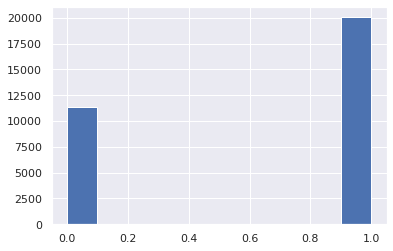

In [101]:
hist = plt.hist(x=df2["Selected"].values)

In [33]:
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
data = pd.read_csv(os.path.join('realcause_datasets/bpic17_sample1.csv'), sep=',')

In [141]:
data

,ApplicationType_Limit raise,ApplicationType_New credit,LoanGoal_Car,LoanGoal_Caravan / Camper,LoanGoal_Existing loan takeover,LoanGoal_Extra spending limit,LoanGoal_Home improvement,LoanGoal_Motorcycle,LoanGoal_Not speficied,"LoanGoal_Other, see explanation",LoanGoal_Remaining debt home,LoanGoal_Unknown,LoanGoal_other,RequestedAmount,timesincefirstcase,Activity_A_Accepted,Activity_A_Cancelled,Activity_A_Complete,Activity_A_Concept,Activity_A_Create Application,Activity_A_Denied,Activity_A_Pending,Activity_A_Submitted,Activity_A_Validating,Activity_O_Accepted,Activity_O_Cancelled,Activity_O_Create Offer,Activity_O_Created,Activity_O_Refused,Activity_O_Returned,Activity_O_Sent (mail and online),Activity_O_Sent (online only),Activity_W_Assess potential fraud,Activity_W_Call after offers,Activity_W_Complete application,Activity_W_Handle leads,Activity_W_Shortened completion,Activity_W_Validate application,org:resource_User_1,org:resource_User_10,org:resource_User_100,org:resource_User_101,org:resource_User_102,org:resource_User_103,org:resource_User_104,org:resource_User_105,org:resource_User_106,org:resource_User_107,org:resource_User_108,org:resource_User_109,org:resource_User_11,org:resource_User_110,org:resource_User_111,org:resource_User_112,org:resource_User_113,org:resource_User_114,org:resource_User_115,org:resource_User_116,org:resource_User_117,org:resource_User_118,org:resource_User_119,org:resource_User_12,org:resource_User_120,org:resource_User_121,org:resource_User_122,org:resource_User_123,org:resource_User_124,org:resource_User_125,org:resource_User_126,org:resource_User_127,org:resource_User_128,org:resource_User_129,org:resource_User_13,org:resource_User_130,org:resource_User_131,org:resource_User_132,org:resource_User_133,org:resource_User_134,org:resource_User_135,org:resource_User_136,org:resource_User_137,org:resource_User_138,org:resource_User_139,org:resource_User_14,org:resource_User_140,org:resource_User_141,org:resource_User_142,org:resource_User_143,org:resource_User_144,org:resource_User_145,org:resource_User_146,org:resource_User_15,org:resource_User_16,org:resource_User_17,org:resource_User_18,org:resource_User_19,org:resource_User_2,org:resource_User_20,org:resource_User_21,org:resource_User_22,org:resource_User_23,org:resource_User_24,org:resource_User_25,org:resource_User_26,org:resource_User_27,org:resource_User_28,org:resource_User_29,org:resource_User_3,org:resource_User_30,org:resource_User_31,org:resource_User_32,org:resource_User_33,org:resource_User_34,org:resource_User_35,org:resource_User_36,org:resource_User_37,org:resource_User_38,org:resource_User_39,org:resource_User_4,org:resource_User_40,org:resource_User_41,org:resource_User_42,org:resource_User_43,org:resource_User_44,org:resource_User_45,org:resource_User_46,org:resource_User_47,org:resource_User_48,org:resource_User_49,org:resource_User_5,org:resource_User_50,org:resource_User_51,org:resource_User_52,org:resource_User_53,org:resource_User_54,org:resource_User_55,org:resource_User_56,org:resource_User_57,org:resource_User_58,org:resource_User_59,org:resource_User_6,org:resource_User_60,org:resource_User_61,org:resource_User_62,org:resource_User_63,org:resource_User_64,org:resource_User_65,org:resource_User_66,org:resource_User_67,org:resource_User_68,org:resource_User_69,org:resource_User_7,org:resource_User_70,org:resource_User_71,org:resource_User_72,org:resource_User_73,org:resource_User_74,org:resource_User_75,org:resource_User_76,org:resource_User_77,org:resource_User_78,org:resource_User_79,org:resource_User_8,org:resource_User_80,org:resource_User_81,org:resource_User_82,org:resource_User_83,org:resource_User_84,org:resource_User_85,org:resource_User_86,org:resource_User_87,org:resource_User_88,org:resource_User_89,org:resource_User_9,org:resource_User_90,org:resource_User_91,org:resource_User_92,org:resource_User_93,org:resource_User_94,org:resource_User_95,org:resource_User_96,org:resource_User_97,org:resource_User_98,o

In [107]:
features_fake = data.drop(['t', 'y', 'y0', 'y1', 'ite', 'Activity_A_Create Application'], axis=1)

In [114]:
corr2 = features_fake.corrwith(data['y'])
corr2_s = features_fake.corrwith(data['y'], method='spearman')

In [120]:
corr2_wt = features_fake.corrwith(data['t'])
corr2_wt_s = features_fake.corrwith(data['t'], method='spearman')

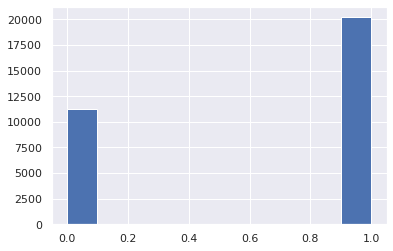

In [100]:
hist = plt.hist(x=data['y'].values)

In [66]:
import zipfile

In [67]:
with zipfile.ZipFile("GenModelCkpts.zip","r") as zip_ref:
    zip_ref.extractall('/home/zdashtbozorg/realcause/')

In [130]:
import json
from os import path

f = open('/home/zdashtbozorg/realcause/results/bpic17_results.json',)
json = json.load(f)

In [132]:
results = pd.DataFrame.from_dict(pd.json_normalize(json), orient='columns')

In [106]:
json

{'bpic17_bpic17': {'univariate_test_size': 12566,
  'multivariate_test_size': 200,
  'pehe': None,
  'ate': None,
  'ate_est': None,
  'univariate_metrics': {'avg_t_ks_pval': 0.7605026078191525,
   'avg_y_ks_pval': 1.0,
   'avg_t_es_pval': 0.6567792312557632,
   'avg_y_es_pval': 0.9396733247167456},
  'multivariate_metrics_w': {'avg_w1_pval': 0.089,
   'avg_w2_pval': 0.024,
   'avg_fr_pval': 0.5979999899864197,
   'avg_knn_pval': 0.796999990940094,
   'avg_energy_pval': 0.16899999976158142},
  'multivariate_metrics_no_w': {'avg_w1_pval': 0.432,
   'avg_w2_pval': 0.346,
   'avg_fr_pval': 1.0,
   'avg_knn_pval': 0.2919999957084656,
   'avg_energy_pval': 0.45399999618530273}}}

<font size="5">Statistical tests:</font> <br>

<font size="4">Univariate tests:</font> <br>
Kolmogorov-Smirnov (KS) <br>
Epps-Singleton (ES) <br>


<font size="4">Multivariate tests:</font> <br>
Friedman-Rafsky (FR) <br>
k-nearest neighbour (kNN) <br>
Energy <br>
Permutation test with Wasserstein-1 (W1) <br>
Permutation test with Wasserstein-2 (W2)<br>

In [134]:
results.T

,0
bpic17_bpic17.univariate_test_size,12566
bpic17_bpic17.multivariate_test_size,200
bpic17_bpic17.pehe,None
bpic17_bpic17.ate,None
bpic17_bpic17.ate_est,None
bpic17_bpic17.univariate_metrics.avg_t_ks_pval,0.760503
bpic17_bpic17.univariate_metrics.avg_y_ks_pval,1.0
bpic17_bpic17.univariate_metrics.avg_t_es_pval,0.656779
bpic17_bpic17.univariate_metrics.avg_y_es_pval,0.939673
bpic17_bpic17.multivariate_metrics_w.avg_w1_pval,0.089


<font size="5">Pearson and Spearman correlations for W and Y</font> <br>

In [139]:
pearson = np.linalg.norm(corr2.values-corr1.values)
print(pearson)

0.09774991914925837


In [140]:
spearman = np.linalg.norm(corr2_s.values-corr1_s)
print(spearman)

0.11169788145883897


<font size="5">Pearson and Spearman correlations for W and T</font> <br>

In [122]:
pearson_wt = np.linalg.norm(corr2_wt.values-corr1_wt.values)
print(pearson_wt)

0.023454155440574644

In [123]:
spearman_wt = np.linalg.norm(corr2_wt_s.values-corr1_wt_s.values)
print(spearman_wt)

0.021329606667538806

<font size="5">Pearson correlations for T and Y</font> <br>

In [137]:
corr1_ty = df2[treatment].corr(df2[outcome])
print(corr1_ty)

corr2_ty = data['t'].corr(data['y'])
print(corr2_ty)

0.5385410874106883
0.5551548849684445


<font size="5">Spearman correlations for T and Y</font> <br>

In [138]:
corr1_ty_s = df2[treatment].corr(df2[outcome], method='spearman')
print(corr1_ty_s)

corr2_ty_s = data['t'].corr(data['y'], method='spearman')
print(corr2_ty_s)

0.5385410874106921
0.5551548849684471
